[[ 0.83685684  2.13635938]
 [-1.4136581   7.40962324]
 [ 1.15521298  5.09961887]
 [-1.01861632  7.81491465]
 [ 1.27135141  1.89254207]]
[1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 1 3 2 2 3 0 3 3 2 0 2 0 2 3 0
 3 3 3 0 3 0 1 2 3 2 1 0 3 0 0 1 0 2 2 0 1 0 0 3 1 0 2 3 1 1 0 2 1 0 2 2 0
 0 0 0 1 3 0 2 0 0 2 2 2 0 2 3 0 2 1 2 0 3 2 3 0 3 0 2 0 0 3 2 2 1 1 0 3 1
 1 2 1 2 0 3 3 0 0 3 0 1 2 0 1 2 3 2 1 0 1 3 3 3 3 2 2 3 0 2 1 0 2 2 2 1 1
 3 0 0 2 1 3 2 0 3 0 1 1 2 2 0 1 1 1 0 3 3 1 1 0 1 1 1 3 2 3 0 1 1 3 3 3 1
 1 0 3 2]


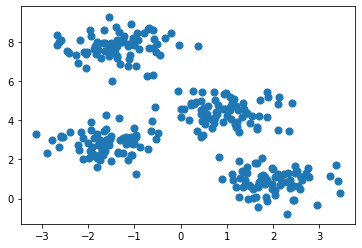

In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets.samples_generator import make_blobs
X, y_test = make_blobs(n_samples = 300, centers = 4, cluster_std = 0.60, random_state = 0)
plt.scatter(X[:,0], X[:,1],s = 50)
print(X[0:5,:])
print(y_test)

In [64]:
# this step is to randomly select n_clusters points from X as \\
# initialization of centeroids

rseed = 2
rng = np.random.RandomState(rseed) # generate a random state
i = rng.permutation(X.shape[0])[:4] # randomly permutate the size of X(row of x) and select n_clusters index
centeroids = X[i]
print(centeroids)

[[ 0.27239604  5.46996004]
 [-1.36999388  7.76953035]
 [ 0.08151552  4.56742235]
 [-0.6149071   3.94963585]]


In [65]:
# this part is to help visualize how the pairwise_distances_argmin() fucntion does
# it returns the classification labels that maps all the points in X to the closet(argmin) centeroid point

labels = pairwise_distances_argmin(X, centeroids)
print(labels)
print(len(labels))
print(len(X))
mean_point = X[np.where(labels == 1)].mean(0) # compute the mean point among points with labled by 1
print(mean_point)

[3 1 0 1 3 2 3 2 1 1 3 1 2 1 3 2 2 3 3 3 2 3 0 3 3 2 3 2 3 2 1 1 2 1 1 1 1
 1 3 3 2 3 0 2 3 3 1 3 1 3 3 3 1 3 2 3 1 3 1 3 1 2 1 3 3 3 1 3 1 3 2 3 1 3
 3 1 3 2 3 1 3 2 3 3 1 0 3 0 1 1 2 3 1 3 3 2 3 2 0 3 1 3 1 3 2 3 3 0 1 0 3
 3 3 1 3 2 1 3 3 0 3 3 3 3 3 3 3 3 3 3 1 3 3 3 1 3 3 1 3 1 1 3 2 3 0 3 1 2
 1 1 1 2 0 2 3 3 1 3 3 0 1 2 2 3 2 3 3 2 3 2 2 1 3 0 3 1 2 3 2 3 3 2 3 3 2
 2 0 2 2 1 3 3 2 2 3 3 3 2 3 1 2 3 3 3 2 1 3 1 2 1 2 3 2 0 1 3 3 3 3 2 1 3
 3 3 3 3 3 1 1 0 2 1 2 3 3 2 3 3 1 3 2 2 2 1 1 1 1 3 3 0 0 3 3 2 3 3 3 3 3
 1 2 2 3 3 1 3 2 1 0 3 3 3 3 2 2 3 3 0 1 1 2 2 2 3 3 2 1 3 1 2 3 3 1 1 1 3
 2 2 1 3]
300
300
[-1.39262004  7.7943098 ]


In [66]:
A=np.array([[1,2],[3,4]])
print(A.mean(0)) # this will give the mean point of given points(2-D)

[2. 3.]


In [77]:
from sklearn.metrics import pairwise_distances_argmin
def K_means_cluster(X, n_clusters):
    rseed = 2
    rng = np.random.RandomState(rseed) # generate a random state
    i = rng.permutation(X.shape[0])[:n_clusters] # randomly permutate the size of X(row of x) and select n_clusters index
    old_centeroids = np.array(X[i])  # initialize the centeroids
    # then assign labels to the corresponding centeroids based on the minimal eucledian distance

    while True:
        labels = pairwise_distances_argmin(X, old_centeroids) # classify all points corresponding to centeroids
        # update the new centeroids by calculating the mean points correponding to different groups
        updated_centeroids = np.array([X[np.where(labels == index)].mean(0) for index in range(n_clusters)])
                                       
        
        if np.all(updated_centeroids == old_centeroids):
            break
        else:
            old_centeroids = updated_centeroids
    return labels, updated_centeroids
    

In [78]:
# above is the manual construction of K-means clustering
# next we will import the package directly from sklearn
from sklearn.cluster import KMeans
km_cls = KMeans(n_clusters = 4)
km_cls.fit(X)
labels_predicted = km_cls.predict(X)
print(labels_predicted)


[2 0 3 0 2 2 1 3 0 0 1 0 3 0 2 3 3 2 1 1 2 2 3 1 1 3 2 3 1 3 0 0 3 0 0 0 0
 0 1 2 3 1 3 3 1 1 0 1 0 2 1 2 0 2 2 1 0 1 0 2 0 3 0 1 1 1 0 2 0 1 3 1 0 1
 1 0 1 3 2 0 2 3 2 2 0 3 2 3 0 0 3 2 0 1 1 3 2 2 3 1 0 2 0 2 3 2 2 3 0 3 1
 1 2 0 2 3 0 2 2 3 1 2 1 2 2 2 2 1 2 1 0 1 1 2 0 1 1 0 3 0 0 1 3 1 3 1 0 3
 0 0 0 3 0 3 2 1 0 1 2 3 0 3 3 2 3 1 1 3 2 3 3 0 2 3 1 0 2 2 3 1 2 3 1 1 3
 3 3 3 2 0 3 1 3 3 1 1 1 3 1 0 3 1 2 1 3 0 1 0 3 0 3 1 3 3 0 1 1 2 2 3 0 2
 2 1 2 1 3 0 0 3 3 0 3 2 1 3 2 1 0 1 2 3 2 0 0 0 0 1 1 0 3 1 2 3 1 1 1 2 2
 0 3 3 1 2 0 1 3 0 3 2 2 1 1 3 2 2 2 3 0 0 2 2 3 2 2 2 0 1 0 3 2 2 0 0 0 2
 2 3 0 1]


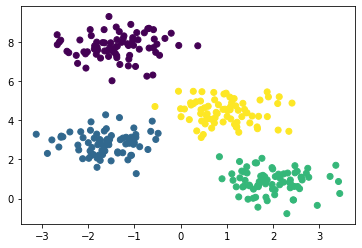

In [86]:
# using the sklearn package KMeans to do the clustring
plt.scatter(X[:,0],X[:,1], c = labels_predicted, cmap = 'viridis')



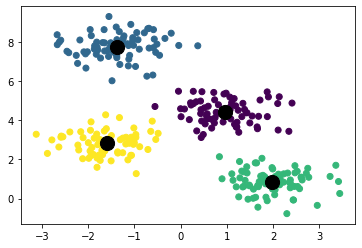

In [90]:
# using the dataset make_blobs to do clustering with our fucntion
points_classified, final_centeroids = K_means_cluster(X, 4)
plt.scatter(X[:,0],X[:,1], c = points_classified, cmap = 'viridis')
plt.scatter(final_centeroids[:,0],final_centeroids[:,1], c ='black', s= 200)

Compared with directly using the KMeans package in sklearn, our consturcted function K_means_cluster also works well in doing the clustering. And it also returns the exact position of the computed centeroids.

In [140]:
# Next, I want to do something mathematical that \\
# I want to write the pairwise_distances_argmin() function by hands with only numpy
# inputs: two numpy arrays A, B
# output: an array of integers (labels), labels
# in order to differentiate with sklearn.metric.pairwise_distances_argmin\\
# we denote our function as  label_points_min
def label_points_min(A, B):
    num_points = len(A)
    num_centeroids = len(B)
    dist_to_cent = np.zeros((num_points,num_centeroids))
    label_list = []
    for i in range(num_points):
        for j in range(num_centeroids):
            dist_to_cent[i][j] = np.linalg.norm(A[i]-B[j])
    for row in dist_to_cent:
        label = np.where(row == row.min())[0][0]
        label_list.append(label)
        
    return np.array(label_list)
        
        
        

In [143]:
# this part I want to show:
# by using the function we write: label_points_min, the whole model does the exactly same thing
# compared with using the sklearn built-in function: pairwise_distances_argmin,
# in our manually contstructed model of K_means_cluster


def K_means_cluster_new(X, n_clusters):
    rseed = 2
    rng = np.random.RandomState(rseed) # generate a random state
    i = rng.permutation(X.shape[0])[:n_clusters] # randomly permutate the size of X(row of x) and select n_clusters index
    old_centeroids = np.array(X[i])  # initialize the centeroids
    # then assign labels to the corresponding centeroids based on the minimal eucledian distance

    while True:
        labels = label_points_min(X, old_centeroids) # classify all points corresponding to centeroids
        # update the new centeroids by calculating the mean points correponding to different groups
        updated_centeroids = np.array([X[np.where(labels == index)].mean(0) for index in range(n_clusters)])
                                       
        
        if np.all(updated_centeroids == old_centeroids):
            break
        else:
            old_centeroids = updated_centeroids
    return labels, updated_centeroids
    

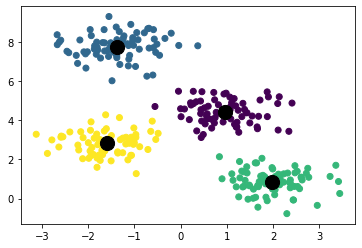

In [144]:
points_classified, final_centeroids = K_means_cluster_new(X, 4)
plt.scatter(X[:,0],X[:,1], c = points_classified, cmap = 'viridis')
plt.scatter(final_centeroids[:,0],final_centeroids[:,1], c ='black', s= 200)

In [145]:
A = np.array([[1,2],[3,4],[7,9],[5,5]])
B = np.array([[2,2],[4,4]])
print(pairwise_distances_argmin(A,B))
print(label_points_min(A,B))
# we can see the function we write is 100% equivalent to the built-in function pairwise_distances_argmin(A,B)
# bacuase they return the same result.

[0 1 1 1]
[0 1 1 1]
